## load packages

In [1]:
!pwd
!ls

/Users/ricky/Desktop/sp23-ancient-artifacts-team8/2_eda
eda_combined.ipynb                  eda_origin_data.ipynb
eda_new_data.ipynb                  preliminary_eda_preprocessing.ipynb


In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

## read data

In [3]:
master_micro = pd.read_csv("../0_data/master.csv")

In [6]:
micro = master_micro[(master_micro['size_micro']!="unknown") | (master_micro['type_micro']=="lithic")].iloc[: , 1:]

In [7]:
pd.set_option('display.max_columns', None)
micro

,Id,Img Id,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,Perimeter,CHull Area,CHull Perimeter,Sphericity,L/T Ratio,T/L Aspect Ratio,Compactness,Roundness,Ellipse Ratio,Circularity,Solidity,Concavity,Convexity,Extent,hash,Transparency,Curvature,Surface Area,Filter0,Filter1,Filter2,Filter3,Filter4,Filter5,Filter6,L/W Ratio,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,Krumbein Rnd,size_micro,type_micro
0,104,10708,30.893,38.251,36.878,46.822,10.179,44.168,10.102,34.444,9202.973,749.562,120.170,802.914,108.399,0.808,4.600,0.217,0.660,0.435,0.229,0.652,0.934,0.066,0.902,1.573,0,0.081,0.0,2998.247,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.270,0.788,3.623,0.276,3211.655,23.529,19.392,4.372,49.768,22.823,0.214,unknown,lithic
1,19,5682,27.727,33.375,35.149,40.001,9.029,39.022,7.978,34.108,6646.859,603.785,104.849,636.820,99.590,0.831,4.430,0.226,0.693,0.480,0.204,0.690,0.948,0.052,0.950,1.672,0,0.126,0.0,2415.141,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.138,0.879,3.893,0.257,2547.278,22.089,20.688,4.891,37.445,5.128,0.214,unknown,lithic
2,14,4826,26.726,36.061,30.199,46.332,8.025,47.365,7.753,28.230,5879.233,560.995,113.290,642.874,100.583,0.741,5.774,0.173,0.577,0.333,0.164,0.549,0.873,0.127,0.888,1.509,0,0.096,0.0,2243.981,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.534,0.652,3.763,0.266,2571.497,19.112,21.250,6.110,52.384,17.379,0.219,unknown,lithic
3,1,2812,24.408,36.198,25.039,57.353,5.086,50.536,4.904,23.943,3824.409,467.900,113.719,500.291,108.846,0.674,11.276,0.089,0.426,0.181,0.097,0.455,0.935,0.065,0.957,1.604,0,0.088,0.0,1871.602,Reject,Reject,Reject,Reject,Reject,Reject,Reject,2.291,0.437,4.923,0.203,2001.165,15.063,18.233,10.304,51.467,17.096,0.251,unknown,lithic
4,83,9441,22.869,29.388,24.044,39.820,4.390,38.568,3.948,22.535,2200.862,410.744,92.327,436.309,89.254,0.778,9.070,0.110,0.574,0.330,0.102,0.606,0.941,0.059,0.967,2.350,0,0.077,0.0,1642.977,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.656,0.604,5.477,0.183,1745.237,14.217,17.086,9.769,36.426,3.135,0.276,unknown,lithic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483648,591,13305,0.146,0.155,0.129,0.168,0.129,0.166,0.131,0.131,0.001,0.017,0.486,0.017,0.484,0.945,1.297,0.771,0.871,0.759,0.787,0.893,0.976,0.024,0.996,0.773,0,0.333,0.0,0.067,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.297,0.771,1.000,1.000,0.069,0.129,55.000,1.271,0.000,0.000,NaN,4mm,soil
483649,464,10826,0.137,0.141,0.128,0.155,0.128,0.147,0.127,0.127,0.001,0.015,0.443,0.015,0.442,0.970,1.208,0.828,0.886,0.784,0.859,0.942,0.989,0.011,0.996,0.744,0,0.350,0.0,0.059,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.208,0.828,1.000,1.000,0.060,0.128,63.750,1.164,0.000,0.000,NaN,4mm,soil
483650,236,8388,0.144,0.149,0.128,0.163,0.128,0.156,0.132,0.132,0.001,0.016,0.469,0.016,0.468,0.965,1.274,0.785,0.885,0.783,0.847,0.931,0.995,0.005,1.000,0.783,0,0.442,0.0,0.065,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.274,0.785,1.000,1.000,0.065,0.128,56.667,1.180,0.000,0.000,NaN,4mm,soil
483651,369,9727,0.148,0.154,0.126,0.179,0.126,0.174,0.126,0.126,0.001,0.017,0.485,0.017,0.485,0.962,1.415,0.707,0.829,0.688,0.723,0.926,1.000,0.000,1.000,0.764,0,0.276,0.0,0.069,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.415,0.707,1.000,1.000,0.069,0.126,56.667,1.383,0.000,0.000,NaN,4mm,soil


## EDA

### Types

In [8]:
micro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410340 entries, 0 to 483652
Data columns (total 50 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  410340 non-null  int64  
 1   Img Id              410340 non-null  int64  
 2   Da                  410340 non-null  float64
 3   Dp                  410340 non-null  float64
 4   FWidth              410340 non-null  float64
 5   FLength             410340 non-null  float64
 6   FThickness          410340 non-null  float64
 7   ELength             410340 non-null  float64
 8   EThickness          410340 non-null  float64
 9   EWidth              410340 non-null  float64
 10  Volume              410340 non-null  float64
 11  Area                410340 non-null  float64
 12  Perimeter           410340 non-null  float64
 13  CHull  Area         410340 non-null  float64
 14  CHull Perimeter     410340 non-null  float64
 15  Sphericity          410340 non-nul

### Convert data type

In [9]:
micro[micro.columns[:30]] = micro[micro.columns[:30]].apply(lambda x: pd.to_numeric(x, errors='coerce'))
micro[micro.columns[37:48]] = micro[micro.columns[37:48]].apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [10]:
micro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410340 entries, 0 to 483652
Data columns (total 50 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  410340 non-null  int64  
 1   Img Id              410340 non-null  int64  
 2   Da                  410340 non-null  float64
 3   Dp                  410340 non-null  float64
 4   FWidth              410340 non-null  float64
 5   FLength             410340 non-null  float64
 6   FThickness          410340 non-null  float64
 7   ELength             410340 non-null  float64
 8   EThickness          410340 non-null  float64
 9   EWidth              410340 non-null  float64
 10  Volume              410340 non-null  float64
 11  Area                410340 non-null  float64
 12  Perimeter           410340 non-null  float64
 13  CHull  Area         410340 non-null  float64
 14  CHull Perimeter     410340 non-null  float64
 15  Sphericity          410340 non-nul

### Descriptive Statistics

In [11]:
micro.describe()

,Id,Img Id,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,Perimeter,CHull Area,CHull Perimeter,Sphericity,L/T Ratio,T/L Aspect Ratio,Compactness,Roundness,Ellipse Ratio,Circularity,Solidity,Concavity,Convexity,Extent,hash,Transparency,Curvature,Surface Area,L/W Ratio,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,Krumbein Rnd
count,410340.000000,410340.000000,410340.000000,410340.000000,410340.000000,410340.000000,410340.000000,410340.000000,410340.000000,410340.000000,410340.000000,410340.000000,410340.000000,410340.000000,410340.000000,410340.000000,410340.000000,410340.000000,410340.000000,410340.000000,410340.000000,410340.000000,410340.000000,410340.000000,410340.000000,410340.000000,410340.0,410340.000000,410340.000000,410340.000000,410340.000000,410340.000000,410340.000000,410340.000000,410340.000000,410340.000000,410340.000000,410340.000000,410340.000000,410340.000000,5299.000000
mean,65091.342769,6115.864193,0.324678,0.360603,0.331734,0.508972,0.222801,0.513822,0.219046,0.323933,0.367854,0.178158,1.132868,0.186966,1.105713,0.906336,2.376814,0.471571,0.660687,0.452710,0.466018,0.825497,0.951565,0.048435,0.978489,0.750581,0.0,0.431996,0.344274,0.712634,1.554129,0.670206,1.523784,0.700284,0.747859,0.277268,56.082196,2.461808,0.326500,0.109658,0.968601
std,44420.540397,2849.044471,0.348458,0.414624,0.348552,0.557281,0.212167,0.553443,0.209080,0.342827,26.973396,2.970121,1.302579,3.208413,1.258405,0.063643,0.907475,0.147483,0.127287,0.161605,0.159458,0.104702,0.056259,0.056259,0.033270,0.153711,0.0,0.080089,0.398645,11.880484,0.367893,0.122452,0.448405,0.161018,12.833649,0.273549,10.976105,1.037520,0.564524,0.204154,0.110638
min,1.000000,1764.000000,0.040000,0.058000,0.021000,0.074000,0.021000,0.041000,0.015000,0.015000,0.000000,0.001000,0.183000,0.001000,0.183000,0.226000,1.032000,0.052000,0.194000,0.037000,0.043000,0.051000,0.111000,0.000000,0.530000,0.071000,0.0,0.000000,0.000000,0.005000,1.032000,0.055000,1.000000,0.119000,0.006000,0.021000,0.000000,1.000000,0.000000,0.000000,0.202000
25%,27384.000000,4474.000000,0.222000,0.243000,0.222000,0.326000,0.147000,0.322000,0.144000,0.218000,0.006000,0.039000,0.763000,0.040000,0.750000,0.886000,1.747000,0.359000,0.566000,0.321000,0.341000,0.784000,0.938000,0.016000,0.974000,0.667000,0.0,0.397000,0.023000,0.155000,1.310000,0.587000,1.228000,0.593000,0.162000,0.190000,50.000000,1.742000,0.000000,0.000000,1.000000
50%,61579.000000,5907.000000,0.263000,0.292000,0.271000,0.421000,0.178000,0.422000,0.175000,0.263000,0.011000,0.054000,0.918000,0.058000,0.896000,0.924000,2.126000,0.470000,0.685000,0.470000,0.464000,0.853000,0.972000,0.028000,0.992000,0.747000,0.0,0.445000,0.218000,0.218000,1.465000,0.683000,1.411000,0.709000,0.230000,0.227000,56.000000,2.154000,0.254000,0.091000,1.000000
75%,95774.000000,7374.000000,0.335000,0.373000,0.352000,0.552000,0.230000,0.567000,0.226000,0.343000,0.022000,0.088000,1.171000,0.093000,1.140000,0.946000,2.784000,0.572000,0.758000,0.575000,0.574000,0.895000,0.984000,0.062000,0.996000,0.822000,0.0,0.483000,0.526000,0.353000,1.705000,0.763000,1.688000,0.814000,0.372000,0.289000,62.857000,2.929000,0.518000,0.171000,1.000000
max,170885.000000,41131.000000,30.893000,38.251000,36.878000,57.353000,16.445000,50.536000,16.227000,34.444000,9202.973000,749.562000,120.170000,802.914000,108.846000,1.000000,19.069000,0.969000,0.977000,0.955000,1.000000,1.000000,1.000000,0.889000,1.000000,3.287000,0.0,0.832000,6.421000,2998.247000,18.300000,0.969000,8.415000,1.000000,3211.655000,23.529000,120.000000,23.322000,52.384000,22.823000,1.000000


In [12]:
micro.groupby('type_micro').describe()

Id                                                     \
               count          mean           std  min      25%      50%   
type_micro                                                                
lithic        5299.0   2650.000000   1529.833869  1.0   1325.5   2650.0   
soil        405041.0  65908.239516  44128.139735  1.0  28709.0  62462.0   

                                 Img Id                                     \
                75%       max     count          mean          std     min   
type_micro                                                                   
lithic       3974.5    5299.0    5299.0  16457.526514  1450.276239  2812.0   
soil        96215.0  170885.0  405041.0   5980.568091  2603.505393  1764.0   

                                                      Da                      \
                25%      50%      75%      max     count      mean       std   
type_micro                                                                     
lithic      16376.0  16613.0  16845.0  19030.0    5299.0  0.408032  1.629126   
soil         4441.0   5877.0   7309.0  41131.0  405041.0  0.323588  0.296991   

                                                     Dp                      \
             min    25%    50%    75%     max     count      mean       std   
type_micro                                                                    
lithic      0.04  0.161  0.193  0.251  30.893    5299.0  0.533303  2.193727   
soil        0.07  0.223  0.264  0.336   7.571  405041.0  0.358344  0.332895   

                                                  FWidth                      \
              min    25%    50%    75%     max     count      mean       std   
type_micro                                                                     
lithic      0.058  0.198  0.250  0.330  38.251    5299.0  0.351058  1.685466   
soil        0.130  0.243  0.293  0.373   9.314  405041.0  0.331481  0.293112   

                                                 FLength                      \
              min    25%    50%    75%     max     count      mean       std   
type_micro                                                                     
lithic      0.021  0.107  0.138  0.194  36.878    5299.0  0.731248  3.023436   
soil        0.125  0.224  0.272  0.353   8.311  405041.0  0.506064  0.440910   

                                               FThickness                      \
              min    25%    50%    75%     max      count      mean       std   
type_micro                                                                      
lithic      0.074  0.254  0.339  0.458  57.353     5299.0  0.220404  0.661258   
soil        0.134  0.327  0.422  0.553  12.830   405041.0  0.222832  0.199711   

                                                ELength                      \
              min    25%    50%   75%     max     count      mean       std   
type_micro                                                                    
lithic      0.021  0.102  0.130  0.17  16.445    5299.0  0.700690  2.950370   
soil        0.125  0.148  0.179  0.23   5.431  405041.0  0.511377  0.442701   

                                                EThickness            \
              min    25%    50%     75%     max      count      mean   
type_micro                                                             
lithic      0.041  0.238  0.315  0.4315  50.536     5299.0  0.208487   
soil        0.127  0.323  0.423  0.5680  13.347   405041.0  0.219185   

                                                            EWidth            \
                 std    min    25%    50%    75%     max     count      mean   
type_micro                                                                     
lithic      0.623842  0.015  0.096  0.122  0.163  16.227    5299.0  0.336963   
soil        0.197976  0.017  0.145  0.176  0.227   5.438  405041.0  0.323762   

                                                            Volume             \
       

In [14]:
micro.groupby('size_micro').describe()

Id                                                 \
               count     mean           std  min       25%      50%   
size_micro                                                            
0.125mm     170885.0  85443.0  49330.394713  1.0  42722.00  85443.0   
0.25mm      115876.0  57938.5  33450.664234  1.0  28969.75  57938.5   
0.5mm       103144.0  51572.5  29775.252420  1.0  25786.75  51572.5   
1mm          10191.0   5096.0   2942.032631  1.0   2548.50   5096.0   
2mm           4340.0   2170.5   1252.994413  1.0   1085.75   2170.5   
4mm            605.0    303.0    174.792734  1.0    152.00    303.0   
unknown       5299.0   2650.0   1529.833869  1.0   1325.50   2650.0   

                                   Img Id                                      \
                  75%       max     count          mean           std     min   
size_micro                                                                      
0.125mm     128164.00  170885.0  170885.0   4291.650396   1309.215268  1951.0   
0.25mm       86907.25  115876.0  115876.0   6301.562403   1172.324473  3770.0   
0.5mm        77358.25  103144.0  103144.0   7597.978690   1339.957416  4662.0   
1mm           7643.50   10191.0   10191.0   8909.472279   2701.294547  3560.0   
2mm           3255.25    4340.0    4340.0  18168.325346  10985.283921  1764.0   
4mm            454.00     605.0     605.0   9031.204959   2305.683998  3179.0   
unknown       3974.50    5299.0    5299.0  16457.526514   1450.276239  2812.0   

                                                       Da                      \
                25%      50%       75%      max     count      mean       std   
size_micro                                                                      
0.125mm      3151.0   4172.0   5463.00   6497.0  170885.0  0.225517  0.043759   
0.25mm       5372.0   6416.0   7307.00   8145.0  115876.0  0.315536  0.076367   
0.5mm        6523.0   7716.0   8752.00   9722.0  103144.0  0.354700  0.132330   
1mm          6856.0   8959.0  11064.00  13919.0   10191.0  0.859683  0.593296   
2mm          9114.0  13654.0  29036.75  41131.0    4340.0  2.066410  1.073485   
4mm          7197.0   9101.0  10741.00  14291.0     605.0  2.729355  2.216004   
unknown     16376.0  16613.0  16845.00  19030.0    5299.0  0.408032  1.629126   

                                                           Dp            \
              min      25%     50%      75%     max     count      mean   
size_micro                                                                
0.125mm     0.077  0.20200  0.2260  0.25000   0.688  170885.0  0.252864   
0.25mm      0.082  0.26200  0.3050  0.36000   0.919  115876.0  0.347854   
0.5mm       0.070  0.26300  0.3250  0.41500   1.473  103144.0  0.390085   
1mm         0.104  0.28700  0.6240  1.35600   3.783   10191.0  0.930845   
2mm         0.120  0.93025  2.4115  2.74425   5.780    4340.0  2.316349   
4mm         0.137  0.48200  2.2900  4.82200   7.571     605.0  3.059873   
unknown     0.040  0.16100  0.1930  0.25100  30.893    5299.0  0.533303   

                                                               FWidth  \
                 std    min      25%     50%    75%     max     count   
size_micro                                                              
0.125mm     0.058242  0.130  0.21900  0.2480  0.281   1.021  170885.0   
0.25mm      0.091195  0.134  0.28400  0.3340  0.398   1.160  115876.0   
0.5mm       0.151690  0.132  0.28600  0.3550  0.457   1.760  103144.0   
1mm         0.639726  0.131  0.31600  0.6960  1.459   4.326   10191.0   
2mm         1.242394  0.137  1.07875  2.6395  3.062   9.314    4340.0   
4mm         2.471588  0.141  0.54200  2.9070  5.287   8.996     605.0   
unknown     2.193727  0.058  0.19800  0.2500  0.330  38.251    5299.0   

                                                                      \
                mean       std    min     25%     50%    75%     max   
size_micro                                                 

In [13]:
micro.groupby('size_micro').count()

,Id,Img Id,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,Perimeter,CHull Area,CHull Perimeter,Sphericity,L/T Ratio,T/L Aspect Ratio,Compactness,Roundness,Ellipse Ratio,Circularity,Solidity,Concavity,Convexity,Extent,hash,Transparency,Curvature,Surface Area,Filter0,Filter1,Filter2,Filter3,Filter4,Filter5,Filter6,L/W Ratio,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,Krumbein Rnd,type_micro
size_micro,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.125mm,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,0,170885
0.25mm,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,0,115876
0.5mm,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,0,103144
1mm,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,0,10191
2mm,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,0,4340
4mm,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,0,605
unknown,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299,5299


### Visualizations

#### Means of variables

##### columns 2-9 (Da, Dp, FWidth, FLength, FThickness, ELength, EThickness, EWidth)

In [15]:
mean_by_group = micro.iloc[:, list(range(2,10)) + [-1]].groupby('type_micro').mean()

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

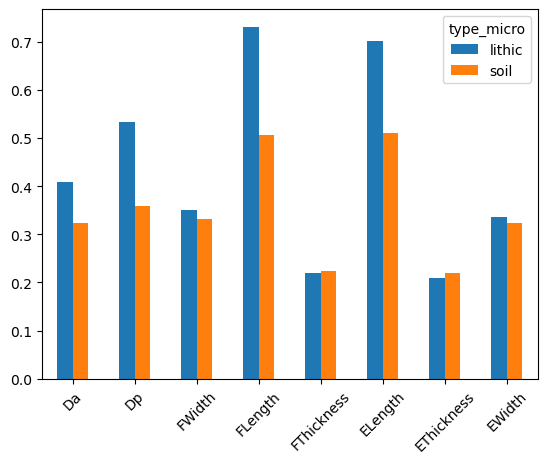

In [16]:
mean_by_group.T.plot(kind='bar', stacked=False)
plt.xticks(rotation=45)

##### columns 10 (Volume)

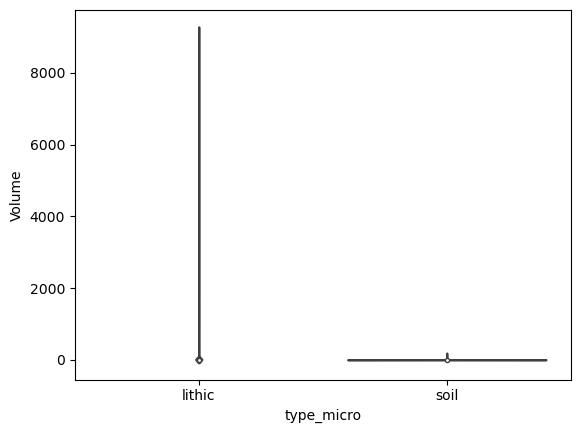

In [17]:
sns.violinplot(x='type_micro', y='Volume', data=micro)

##### columns 11-27 (Area, Perimeter, CHull Area, CHull Perimeter, Sphericity, L/T Ratio, T/L Aspect Ratio, Campactness, Roundness, Ellipse Ratio, Circularity, Solidity, Concavity, Convexity, Extent, Hash, Transparency)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

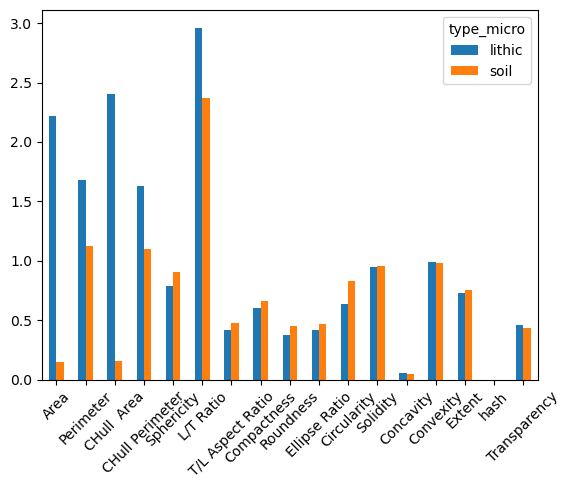

In [18]:
mean_by_group = micro.iloc[:, list(range(11,28)) + [-1]].groupby('type_micro').mean()
mean_by_group.T.plot(kind='bar', stacked=False)
plt.xticks(rotation=45)

##### columns 28 (Surface Area) - 1

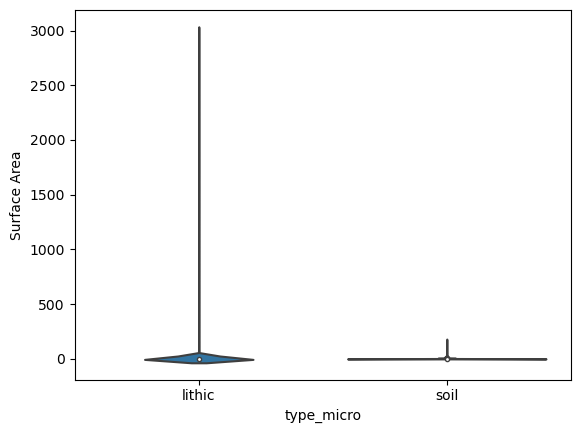

In [19]:
sns.violinplot(x='type_micro', y='Surface Area', data=micro)

##### columns 28 ((Surface Area)) - 2

(array([0]), <a list of 1 Text major ticklabel objects>)

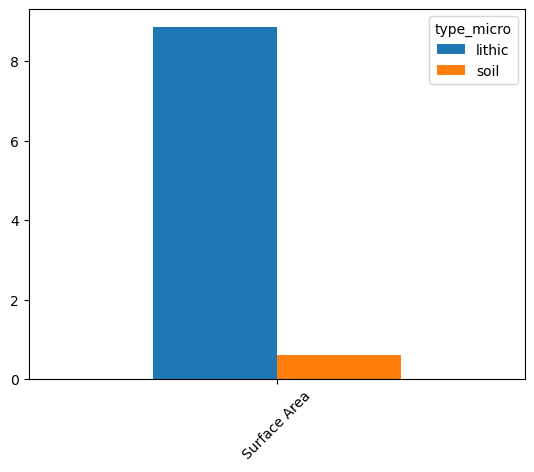

In [20]:
mean_by_group = micro.iloc[:, list(range(29,30)) + [-1]].groupby('type_micro').mean()
mean_by_group.T.plot(kind='bar', stacked=False)
plt.xticks(rotation=45)

##### columns 37-40 (L/W Ratio, W/L Ratio, W/T Ratio, T/W Ratio)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

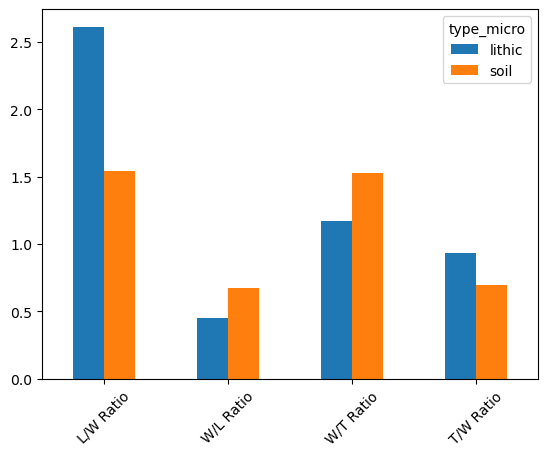

In [21]:
mean_by_group = micro.iloc[:, list(range(37,41)) + [-1]].groupby('type_micro').mean()
mean_by_group.T.plot(kind='bar', stacked=False)
plt.xticks(rotation=45)

##### columns 41 (CHull Surface Area)

(array([0]), <a list of 1 Text major ticklabel objects>)

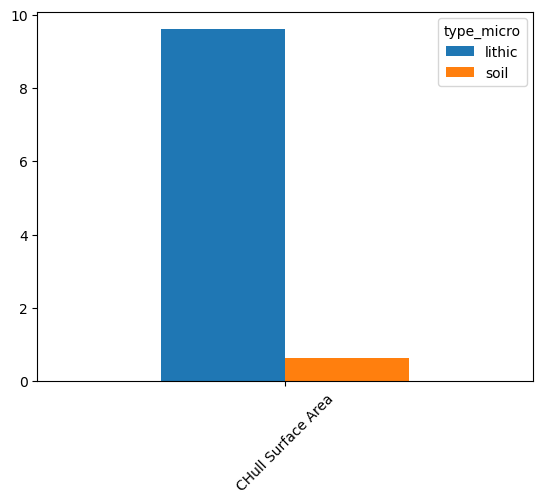

In [22]:
mean_by_group = micro.iloc[:, list(range(41,42)) + [-1]].groupby('type_micro').mean()
mean_by_group.T.plot(kind='bar', stacked=False)
plt.xticks(rotation=45)

##### columns 42 (Sieve)

(array([0]), <a list of 1 Text major ticklabel objects>)

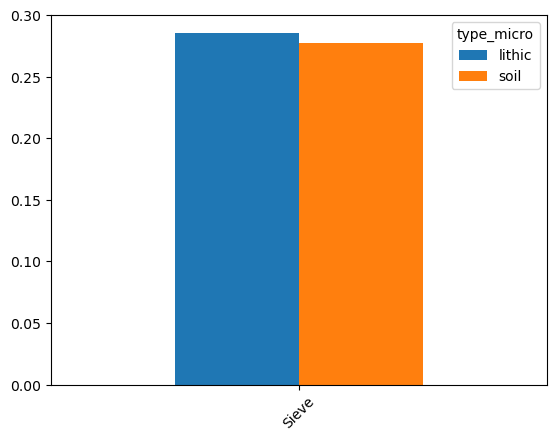

In [23]:
mean_by_group = micro.iloc[:, list(range(42,43)) + [-1]].groupby('type_micro').mean()
mean_by_group.T.plot(kind='bar', stacked=False)
plt.xticks(rotation=45)

##### columns 43 (Angularity)

(array([0]), <a list of 1 Text major ticklabel objects>)

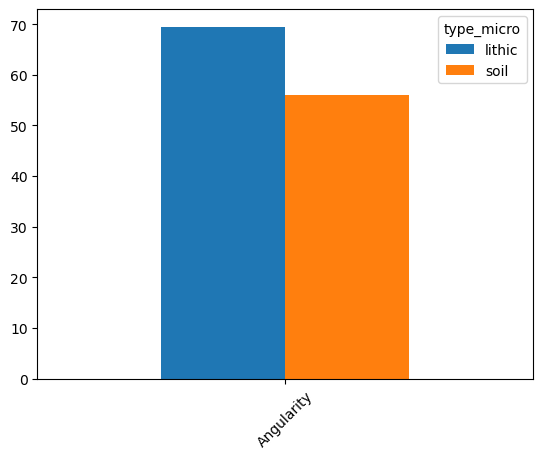

In [24]:
mean_by_group = micro.iloc[:, list(range(43,44)) + [-1]].groupby('type_micro').mean()
mean_by_group.T.plot(kind='bar', stacked=False)
plt.xticks(rotation=45)

##### columns 44 (Ellipticity)

(array([0]), <a list of 1 Text major ticklabel objects>)

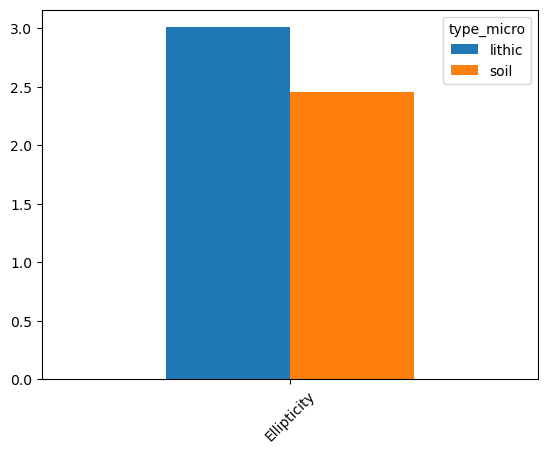

In [25]:
mean_by_group = micro.iloc[:, list(range(44,45)) + [-1]].groupby('type_micro').mean()
mean_by_group.T.plot(kind='bar', stacked=False)
plt.xticks(rotation=45)

##### columns 45-47 (Fiber Length, Fiber Width, Krumbein Rnd)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

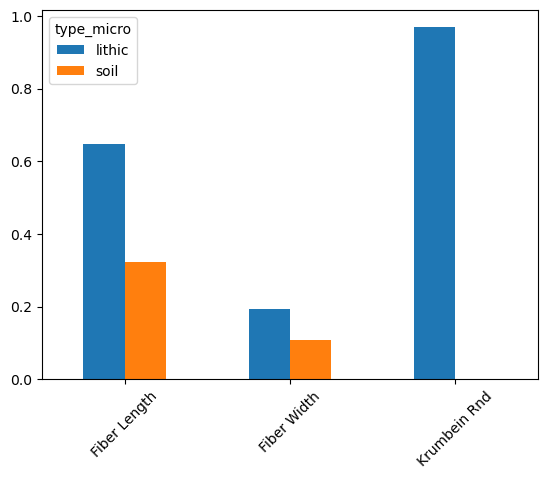

In [26]:
mean_by_group = micro.iloc[:, list(range(45,48)) + [-1]].groupby('type_micro').mean()
mean_by_group.T.plot(kind='bar', stacked=False)
plt.xticks(rotation=45)

In [27]:
micro.head(1)

,Id,Img Id,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,Perimeter,CHull Area,CHull Perimeter,Sphericity,L/T Ratio,T/L Aspect Ratio,Compactness,Roundness,Ellipse Ratio,Circularity,Solidity,Concavity,Convexity,Extent,hash,Transparency,Curvature,Surface Area,Filter0,Filter1,Filter2,Filter3,Filter4,Filter5,Filter6,L/W Ratio,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,Krumbein Rnd,size_micro,type_micro
0,104,10708,30.893,38.251,36.878,46.822,10.179,44.168,10.102,34.444,9202.973,749.562,120.17,802.914,108.399,0.808,4.6,0.217,0.66,0.435,0.229,0.652,0.934,0.066,0.902,1.573,0,0.081,0.0,2998.247,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.27,0.788,3.623,0.276,3211.655,23.529,19.392,4.372,49.768,22.823,0.214,unknown,lithic


#### Distributions

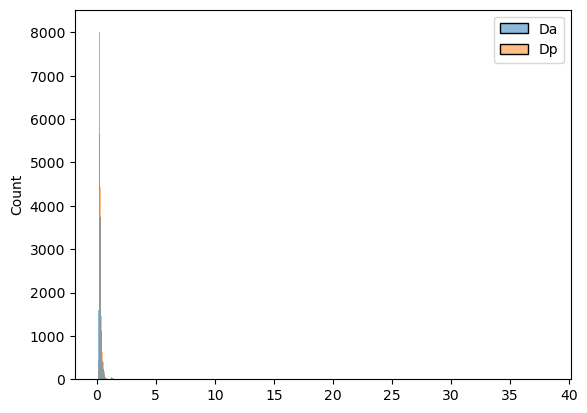

In [28]:
sns.histplot(data=micro[['Da','Dp']])

### Confusion Matrix

In [29]:
corr_micro = micro[["Da", "Sphericity", "Circularity", "Convexity", "FLength", "FWidth", "FThickness", "Transparency", "W/L Ratio", "L/W Ratio"]]

In [30]:
corr_matrix = corr_micro.corr()

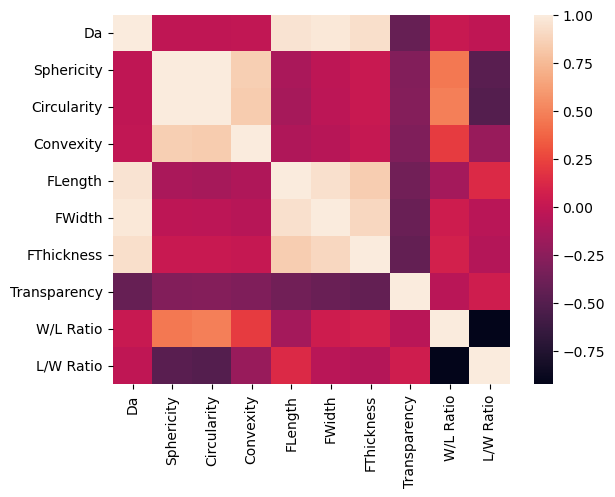

In [31]:
sns.heatmap(corr_matrix)

In [32]:
corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)

,Da,Sphericity,Circularity,Convexity,FLength,FWidth,FThickness,Transparency,W/L Ratio,L/W Ratio
Da,1.00,-0.02,-0.02,-0.01,0.96,0.98,0.93,-0.42,0.02,-0.02
Sphericity,-0.02,1.00,0.99,0.85,-0.12,-0.03,0.03,-0.29,0.45,-0.48
Circularity,-0.02,0.99,1.00,0.84,-0.13,-0.03,0.03,-0.28,0.48,-0.50
Convexity,-0.01,0.85,0.84,1.00,-0.09,-0.05,0.01,-0.31,0.22,-0.19
FLength,0.96,-0.12,-0.13,-0.09,1.00,0.94,0.84,-0.37,-0.14,0.13
FWidth,0.98,-0.03,-0.03,-0.05,0.94,1.00,0.90,-0.40,0.05,-0.05
FThickness,0.93,0.03,0.03,0.01,0.84,0.90,1.00,-0.43,0.08,-0.07
Transparency,-0.42,-0.29,-0.28,-0.31,-0.37,-0.40,-0.43,1.00,-0.05,0.05
W/L Ratio,0.02,0.45,0.48,0.22,-0.14,0.05,0.08,-0.05,1.00,-0.92
L/W Ratio,-0.02,-0.48,-0.50,-0.19,0.13,-0.05,-0.07,0.05,-0.92,1.00


In [33]:
corr_matrix = micro.select_dtypes(include='number').corr()

In [34]:
corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)

/Users/ricky/opt/anaconda3/lib/python3.7/site-packages/pandas/io/formats/style.py:1264: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/Users/ricky/opt/anaconda3/lib/python3.7/site-packages/pandas/io/formats/style.py:1265: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,Id,Img Id,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,Perimeter,CHull Area,CHull Perimeter,Sphericity,L/T Ratio,T/L Aspect Ratio,Compactness,Roundness,Ellipse Ratio,Circularity,Solidity,Concavity,Convexity,Extent,hash,Transparency,Curvature,Surface Area,L/W Ratio,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,Krumbein Rnd
Id,1.00,0.05,-0.20,-0.18,-0.18,-0.15,-0.22,-0.15,-0.22,-0.19,-0.02,-0.05,-0.18,-0.05,-0.19,-0.04,0.10,-0.09,-0.15,-0.14,-0.09,-0.04,-0.12,0.12,-0.09,-0.15,nan,0.14,0.02,-0.05,0.05,-0.08,0.07,-0.07,-0.05,-0.20,0.18,0.11,-0.03,-0.08,0.16
Img Id,0.05,1.00,0.34,0.32,0.32,0.30,0.35,0.29,0.35,0.33,0.02,0.09,0.32,0.08,0.32,-0.05,0.01,0.00,0.06,0.06,0.02,-0.05,0.06,-0.06,0.04,0.14,nan,-0.20,-0.06,0.09,0.07,-0.01,-0.00,0.05,0.08,0.34,-0.27,-0.01,0.15,0.20,0.36
Da,-0.20,0.34,1.00,0.99,0.98,0.96,0.93,0.95,0.93,0.98,0.49,0.68,0.99,0.68,0.99,-0.02,0.05,-0.05,0.03,0.03,-0.04,-0.02,0.04,-0.04,-0.01,0.17,nan,-0.42,-0.08,0.68,-0.02,0.02,0.08,-0.08,0.68,0.99,-0.49,0.04,0.65,0.68,-0.68
Dp,-0.18,0.32,0.99,1.00,0.97,0.98,0.90,0.97,0.89,0.96,0.54,0.73,1.00,0.72,1.00,-0.08,0.08,-0.07,-0.01,-0.01,-0.07,-0.09,-0.02,0.02,-0.06,0.14,nan,-0.38,-0.06,0.73,0.02,-0.01,0.10,-0.08,0.72,0.96,-0.45,0.08,0.72,0.69,-0.68
FWidth,-0.18,0.32,0.98,0.97,1.00,0.94,0.90,0.93,0.89,1.00,0.52,0.69,0.97,0.69,0.97,-0.03,0.11,-0.10,-0.02,-0.02,-0.09,-0.03,-0.01,0.01,-0.05,0.16,nan,-0.40,-0.07,0.69,-0.05,0.05,0.19,-0.17,0.69,0.99,-0.47,0.10,0.66,0.68,-0.66
FLength,-0.15,0.30,0.96,0.98,0.94,1.00,0.84,1.00,0.84,0.94,0.53,0.72,0.98,0.72,0.98,-0.12,0.23,-0.21,-0.16,-0.16,-0.20,-0.13,-0.08,0.08,-0.09,0.06,nan,-0.37,-0.07,0.72,0.13,-0.14,0.19,-0.18,0.72,0.93,-0.42,0.22,0.78,0.73,-0.68
FThickness,-0.22,0.35,0.93,0.90,0.90,0.84,1.00,0.83,1.00,0.90,0.33,0.50,0.90,0.49,0.90,0.03,-0.11,0.10,0.12,0.12,0.10,0.03,0.07,-0.07,0.01,0.07,nan,-0.43,-0.08,0.50,-0.07,0.08,-0.08,0.08,0.49,0.96,-0.54,-0.11,0.47,0.56,-0.68
ELength,-0.15,0.29,0.95,0.97,0.93,1.00,0.83,1.00,0.82,0.93,0.51,0.71,0.97,0.70,0.97,-0.14,0.26,-0.24,-0.19,-0.19,-0.23,-0.15,-0.10,0.10,-0.12,0.04,nan,-0.36,-0.06,0.71,0.16,-0.17,0.20,-0.19,0.70,0.92,-0.42,0.26,0.79,0.73,-0.67
EThickness,-0.22,0.35,0.93,0.89,0.89,0.84,1.00,0.82,1.00,0.90,0.32,0.48,0.89,0.47,0.90,0.04,-0.11,0.10,0.13,0.13,0.11,0.04,0.08,-0.08,0.03,0.08,nan,-0.44,-0.08,0.48,-0.08,0.08,-0.08,0.08,0.47,0.96,-0.55,-0.12,0.45,0.55,-0.68
EWidth,-0.19,0.33,0.98,0.96,1.00,0.94,0.90,0.93,0.90,1.00,0.51,0.68,0.96,0.68,0.97,-0.01,0.09,-0.08,0.01,0.00,-0.07,-0.01,0.01,-0.01,-0.04,0.18,nan,-0.41,-0.07,0.68,-0.06,0.06,0.17,-0.16,0.68,0.99,-0.48,0.07,0.64,0.67,-0.66
